### Import packages

In [1]:
import torch
from dataset import Dataset
from learn import train, test

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Setup running device

In [2]:
use_gpu = True
device = "cuda" if use_gpu and torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### Load dataset

In [3]:
features = [
    'v_enc_dim300',
    'v_freq_freq',
    'v_deg',
    'v_sense',
    'e_vertexsim',
    'e_dir', 'e_rel',
    'e_weightsource',
    'e_srank_rel',
    'e_trank_rel',
    'e_sense'
]

split_frac = 0.8
dataset = Dataset(features, split_frac, device)

loading v_enc_dim300
loading v_freq_freq
loading v_deg
loading v_sense
loading e_vertexsim
loading e_dir
loading e_rel
loading e_weightsource
loading e_srank_rel
loading e_trank_rel
loading e_sense
loading problem plain texts
loading labeled pairs


### Setup training and model configurations

In [4]:
feature_enc_len = 20
feature_enc_type = 'proj+mean'  # 'proj+mean' OR 'concat+proj'
path_enc_type = "Attention"  # 'RNN' OR 'LSTM' OR 'Attention'

num_epoch = 20
learning_rate = 0.001
N = 1024  # batch size
num_iter = num_epoch * (dataset.train_size//N)
print(f"Config: feature_enc_len:{feature_enc_len}, path_enc_type:{path_enc_type}, feature_enc_type:{feature_enc_type}, N:{N}, n_epoch:{num_epoch}, lr:{learning_rate}")

Config: feature_enc_len:20, path_enc_type:Attention, feature_enc_type:proj+mean, N:1024, n_epoch:20, lr:0.001


### Start training

In [5]:
encoder, predictor, loss = train(dataset, feature_enc_len, num_iter, N, learning_rate, device, path_enc_type, feature_enc_type)

defining architecture
Start training
Progress: 4.44%, loss: 6.621088802814484, acc: 0.49853515625, time spent: 0.08 minutes
Progress: 9.44%, loss: 6.37667715549469, acc: 0.48828125, time spent: 0.14 minutes
Progress: 14.44%, loss: 6.303764820098877, acc: 0.48876953125, time spent: 0.20 minutes
Progress: 19.44%, loss: 6.263242602348328, acc: 0.501953125, time spent: 0.26 minutes
Progress: 24.44%, loss: 6.2601364850997925, acc: 0.5078125, time spent: 0.32 minutes
Progress: 29.44%, loss: 6.250221490859985, acc: 0.50830078125, time spent: 0.38 minutes
Progress: 34.44%, loss: 6.253167033195496, acc: 0.50537109375, time spent: 0.44 minutes
Progress: 39.44%, loss: 6.2475438714027405, acc: 0.50927734375, time spent: 0.50 minutes
Progress: 44.44%, loss: 6.244607090950012, acc: 0.5048828125, time spent: 0.57 minutes
Progress: 49.44%, loss: 6.2463653683662415, acc: 0.50634765625, time spent: 0.63 minutes
Progress: 54.44%, loss: 6.238704860210419, acc: 0.51416015625, time spent: 0.69 minutes
Progr

### Test model

In [6]:
config = [feature_enc_len, feature_enc_type, path_enc_type, N, num_epoch]
test(dataset, encoder, predictor, loss, config)

Start testing
Test accuracy: 0.535583570557137, recall: 0.4327731092436975, precision: 0.5244399185336049, f1: 0.47421731123388583


### Plot training loss VS iteration

In [10]:
df = pd.read_csv("train.log")
df.head()

,epoch,train_loss,train_acc,val_loss,val_acc
0,1,0.000718,0.498535,0.000291,0.495730
1,2,0.000692,0.488281,0.000285,0.494103
2,3,0.000684,0.488770,0.000286,0.476617
3,4,0.000680,0.501953,0.000282,0.493697
4,5,0.000679,0.507812,0.000282,0.504270


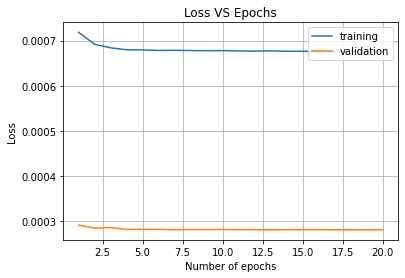

In [11]:
plt.plot(df['epoch'], df['train_loss'])
plt.plot(df['epoch'], df['val_loss'])
plt.legend(['training', 'validation'], loc='upper right')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Loss VS Epochs')
plt.grid()
plt.show()

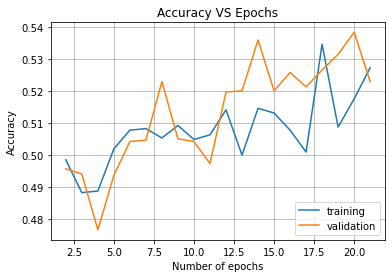

In [9]:
plt.plot(df['epoch'], df['train_acc'])
plt.plot(df['epoch'], df['val_acc'])
plt.legend(['training', 'validation'], loc='lower right')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy VS Epochs')
plt.grid()
plt.show()

### Error Analysis